In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df  = pd.read_csv('/kaggle/input/email-phishing-dataset/email_phishing_data.csv')
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


In [9]:
df.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


In [11]:
df.isnull().sum()

num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64

Text(0.5, 1.0, 'Safe vs Phishing Emails')

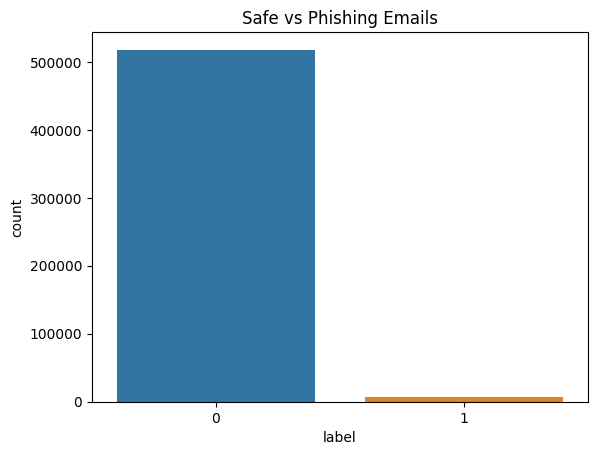

In [13]:
sns.countplot(x='label', data=df)
plt.title('Safe vs Phishing Emails')



<Axes: >

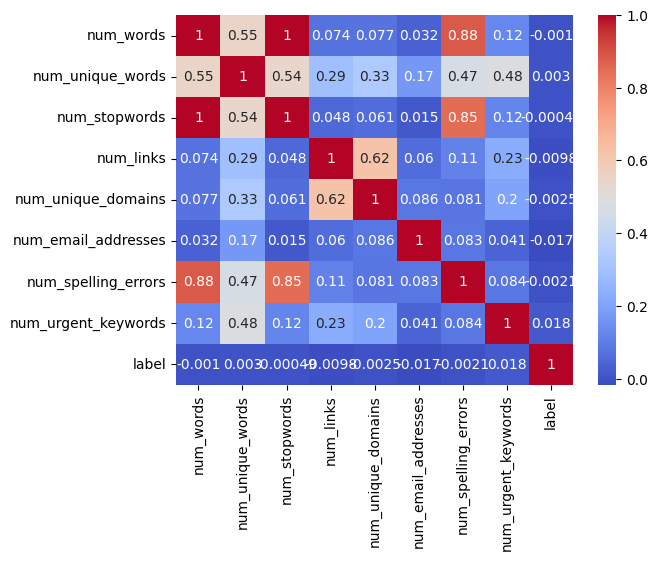

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='label', ylabel='num_links'>

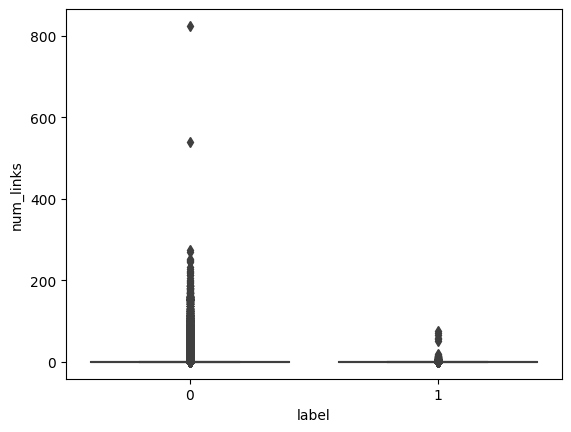

In [15]:
sns.boxplot(x='label', y='num_links', data=df)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [18]:
X = df.drop('label', axis=1)  # Everything except the 'label' column
y = df['label']  # The target: 0 or 1


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [23]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}


In [24]:
from sklearn.metrics import classification_report, confusion_matrix


In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Teach the model
    y_pred = model.predict(X_test)  # Test it on new data
    print(f'---{name}---')
    print(confusion_matrix(y_test, y_pred))  # 0s and 1s count
    print(classification_report(y_test, y_pred))  # Precision, recall, f1-score


---Logistic Regression---
[[155403      1]
 [  2050      0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    155404
           1       0.00      0.00      0.00      2050

    accuracy                           0.99    157454
   macro avg       0.49      0.50      0.50    157454
weighted avg       0.97      0.99      0.98    157454

---Random Forest---
[[155291    113]
 [  1510    540]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    155404
           1       0.83      0.26      0.40      2050

    accuracy                           0.99    157454
   macro avg       0.91      0.63      0.70    157454
weighted avg       0.99      0.99      0.99    157454

